In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder , OneHotEncoder , MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score , log_loss , confusion_matrix

import xgboost as xgb 
import lightgbm as lgb


In [6]:
data_dir = "Customer chrun\Churn_Modelling.csv"

In [7]:
data = pd.read_csv(data_dir)

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [18]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
data = data.dropna()

In [20]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
data.duplicated().sum()

2

In [23]:
data = data.drop_duplicates()

In [35]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,9996.0,NaN,NaN,NaN,5002.497899,2885.744618,1.0,2503.75,5002.5,7501.25,10000.0
CustomerId,9996.0,NaN,NaN,NaN,15690945.430272,71928.404913,15565701.0,15628551.0,15690738.0,15753233.75,15815690.0
Surname,9996,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,9996.0,NaN,NaN,NaN,650.503301,96.624668,350.0,584.0,652.0,717.25,850.0
Geography,9996,3,France,5011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9996,2,Male,5454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,9996.0,NaN,NaN,NaN,38.921071,10.488421,18.0,32.0,37.0,44.0,92.0
Tenure,9996.0,NaN,NaN,NaN,5.013305,2.892353,0.0,3.0,5.0,7.25,10.0
Balance,9996.0,NaN,NaN,NaN,76476.263216,62397.11882,0.0,0.0,97173.29,127639.3725,250898.09
NumOfProducts,9996.0,NaN,NaN,NaN,1.530212,0.581684,1.0,1.0,1.0,2.0,4.0


In [39]:
len(data["Age"].unique())

73

In [24]:
X = data.drop(columns=["RowNumber", "CustomerId" , "Surname","Exited"])
y = data["Exited"]

In [25]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71


In [26]:
y.head()

0    1
1    0
2    1
3    0
5    1
Name: Exited, dtype: int64

In [28]:
cat_feat = X.select_dtypes(include=["object"]).columns
num_feat = X.drop(columns=cat_feat).columns

In [29]:
print(cat_feat)
print(num_feat)

Index(['Geography', 'Gender'], dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


## Data Visualization

Text(0, 0.5, 'Frequency')

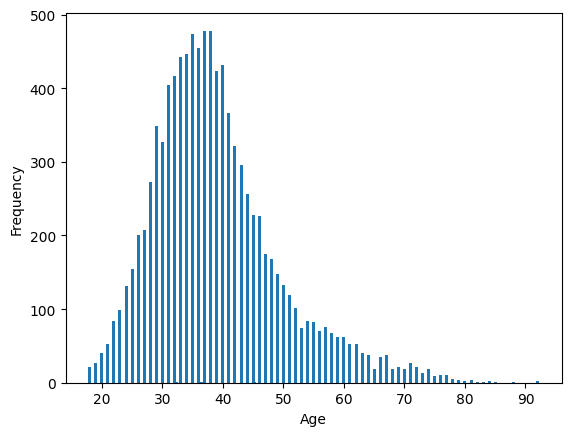

In [44]:
values , freq = X["Age"].value_counts().reset_index().values.T
plt.bar(values , freq , width=0.5)
plt.xlabel("Age")
plt.ylabel("Frequency")

In [49]:
to_plot = list(cat_feat) + ["IsActiveMember" , "Tenure", "NumOfProducts", "HasCrCard"]

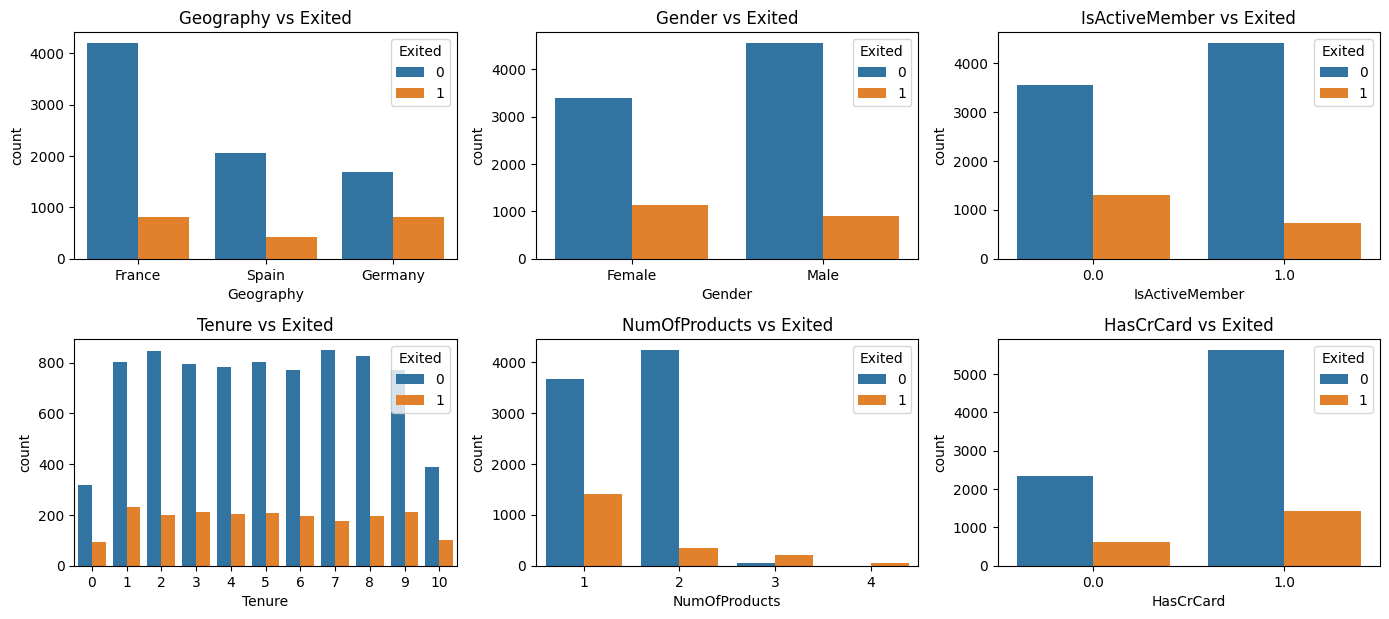

In [50]:
plt.figure(figsize=(14,len(to_plot)*2))
for i , col in enumerate(to_plot):
    plt.subplot(len(to_plot)//2 +1 , 3 , i+1)
    sns.countplot(x=col, hue="Exited" , data=data)
    plt.title(f"{col} vs Exited")
    plt.tight_layout()
plt.show()

In [55]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False)
scaler_min = MinMaxScaler()

def OHE(x_train,  feature):
    new_col = one_hot_encoder.fit_transform(x_train[[feature]] )
    cols = one_hot_encoder.get_feature_names_out([feature])
    x_train[cols] = new_col
    x_train.drop([feature] ,axis=1 , inplace=True)

def Lab(x_train , feature):
    x_train[feature] = label_encoder.fit_transform(x_train[feature])

def scal(x_train , features, scaler=scaler_min):
    x_train[features] = scaler.fit_transform(x_train[features])



In [56]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [57]:
to_scale = ['CreditScore','Age', 'Balance', 'EstimatedSalary']

In [58]:
# Using One Hot Encoder
OHE(X  , "Geography")
OHE(X, "Gender")
OHE(X, "NumOfProducts")

scal(X, to_scale ,scaler=scaler_min)

# X[num_features] = scaler.fit_transform(X[num_features])
# X_test[num_features] = scaler.fit_transform(X_test[num_features])

X['Tenure'] = X['Tenure'] / 10.0

# X['NumOfProducts'] = X['NumOfProducts'] / 4.0
# X_test['NumOfProducts'] = X_test['NumOfProducts'] / 4.0


In [59]:
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size=0.2)

## Model architecture and training

In [86]:
import optuna

# Define the objective function for XGBoost optimization
def objective_xgb(trial):
    X_train_opt, X_valid_opt, y_train_opt, y_valid_opt = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    xgb_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'tree_method': 'hist',
        'early_stopping_rounds':20,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 1.3, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1.3,log=True),
        # Add other XGBoost hyperparameters you want to optimize
    }

    model = xgb.XGBClassifier(**xgb_params)
    model.fit(X_train_opt, y_train_opt, eval_set=[(X_valid_opt, y_valid_opt)],  verbose=False)

    y_pred_opt = model.predict(X_valid_opt)
    accuracy_opt = accuracy_score(y_valid_opt, y_pred_opt)

    return accuracy_opt

# Define the objective function for LightGBM optimization
def objective_lgbm(trial):
    X_train_opt, X_valid_opt, y_train_opt, y_valid_opt = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    lgbm_params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),     
        'num_leaves': trial.suggest_int('num_leaves', 30, 95),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 4,log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 3,log=True),
        # Add other LightGBM hyperparameters you want to optimize
    }

    model = lgb.LGBMClassifier(**lgbm_params, verbose=-1)
    model.fit(X_train_opt, y_train_opt, eval_set=[(X_valid_opt, y_valid_opt)])

    y_pred_opt = model.predict(X_valid_opt)
    accuracy_opt = accuracy_score(y_valid_opt, y_pred_opt)

    return accuracy_opt

# Create a study for XGBoost optimization
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Get the best parameters for XGBoost
best_params_xgb = study_xgb.best_params
print(f"Best XGBoost Parameters: {best_params_xgb}")

# Create a study for LightGBM optimization
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=50)

# Get the best parameters for LightGBM
best_params_lgbm = study_lgbm.best_params
print(f"Best LightGBM Parameters: {best_params_lgbm}")


[I 2024-01-11 14:43:22,306] A new study created in memory with name: no-name-9f95e85c-5873-4a3b-a92e-72766d0ae50a


[I 2024-01-11 14:43:22,730] Trial 0 finished with value: 0.854375 and parameters: {'n_estimators': 419, 'max_depth': 4, 'learning_rate': 0.04439081002216456, 'reg_alpha': 0.6216699074575435, 'reg_lambda': 0.7333006364424447}. Best is trial 0 with value: 0.854375.
[I 2024-01-11 14:43:23,243] Trial 1 finished with value: 0.854375 and parameters: {'n_estimators': 794, 'max_depth': 4, 'learning_rate': 0.022740487374870895, 'reg_alpha': 0.3130269251912604, 'reg_lambda': 0.16951536033375145}. Best is trial 0 with value: 0.854375.
[I 2024-01-11 14:43:23,707] Trial 2 finished with value: 0.85875 and parameters: {'n_estimators': 215, 'max_depth': 8, 'learning_rate': 0.02511789066264193, 'reg_alpha': 0.10619096621491995, 'reg_lambda': 0.9623782236349769}. Best is trial 2 with value: 0.85875.
[I 2024-01-11 14:43:24,430] Trial 3 finished with value: 0.85125 and parameters: {'n_estimators': 695, 'max_depth': 10, 'learning_rate': 0.016008041657203795, 'reg_alpha': 0.6050274925300039, 'reg_lambda': 0

Best XGBoost Parameters: {'n_estimators': 487, 'max_depth': 5, 'learning_rate': 0.029839605557809276, 'reg_alpha': 0.17318908691496707, 'reg_lambda': 0.14151595586740573}


[I 2024-01-11 14:43:41,023] Trial 0 finished with value: 0.8575 and parameters: {'n_estimators': 112, 'max_depth': 7, 'learning_rate': 0.02821596926001495, 'num_leaves': 77, 'reg_alpha': 0.011709036073504759, 'reg_lambda': 0.39623578966036366}. Best is trial 0 with value: 0.8575.
[I 2024-01-11 14:43:43,662] Trial 1 finished with value: 0.844375 and parameters: {'n_estimators': 805, 'max_depth': 7, 'learning_rate': 0.029056340315672512, 'num_leaves': 86, 'reg_alpha': 0.022519417373107243, 'reg_lambda': 0.010980637453090504}. Best is trial 0 with value: 0.8575.
[I 2024-01-11 14:43:44,461] Trial 2 finished with value: 0.850625 and parameters: {'n_estimators': 206, 'max_depth': 8, 'learning_rate': 0.06367571211370988, 'num_leaves': 74, 'reg_alpha': 0.3605892353734206, 'reg_lambda': 0.011007608253124721}. Best is trial 0 with value: 0.8575.
[I 2024-01-11 14:43:46,070] Trial 3 finished with value: 0.848125 and parameters: {'n_estimators': 890, 'max_depth': 8, 'learning_rate': 0.0933111339048

Best LightGBM Parameters: {'n_estimators': 312, 'max_depth': 7, 'learning_rate': 0.016057593365904135, 'num_leaves': 90, 'reg_alpha': 0.44815356297589914, 'reg_lambda': 1.3949677847490654}


### Xgboost 

In [87]:
Xgb_params = {
    'tree_method':'hist',
    'n_estimators': 487, 'max_depth': 5, 'learning_rate': 0.029839605557809276, 'reg_alpha': 0.17318908691496707, 'reg_lambda': 0.14151595586740573
}
Xgb = xgb.XGBClassifier(**Xgb_params)

In [88]:
hist_xgb = Xgb.fit(X_train , y_train)

In [89]:
y_pred = Xgb.predict(X_test)

In [90]:
accuracy_xgb = accuracy_score(y_test , y_pred)
print(accuracy_xgb)

0.8745


### Lightgbm

In [91]:
lgbm_params = {'n_estimators': 312, 'max_depth': 7, 'learning_rate': 0.016057593365904135, 'num_leaves': 90, 'reg_alpha': 0.44815356297589914, 'reg_lambda': 1.3949677847490654}
Lgbm = lgb.LGBMClassifier(**lgbm_params)

In [92]:
hist_lgbm = Lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1669, number of negative: 6327
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 7996, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208729 -> initscore=-1.332602
[LightGBM] [Info] Start training from score -1.332602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [93]:
y_pred_lgbm = Lgbm.predict(X_test)

In [94]:
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(accuracy_lgbm)

0.877


### Voting ensemble

In [95]:
vot = VotingClassifier(estimators=[('xgb',Xgb) , ('lgb' , Lgbm)] , voting="soft" )
vot.fit(X_train , y_train)

[LightGBM] [Info] Number of positive: 1669, number of negative: 6327
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 7996, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208729 -> initscore=-1.332602
[LightGBM] [Info] Start training from score -1.332602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=487, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgb',
                              LGBMClassifier(learning_rate=0.016057593365904135,
                                             max_depth=7, n_estimators=312,
                                             num_leaves=90,
                                             reg_alpha=0.44815356297589914,
                                             reg_lambda=1.3949677847490654))],
                 voting='soft')

In [96]:
y_pred_vot = vot.predict(X_test)

In [97]:
accuracy_vot = accuracy_score(y_test , y_pred_vot)
print(accuracy_vot)

0.879


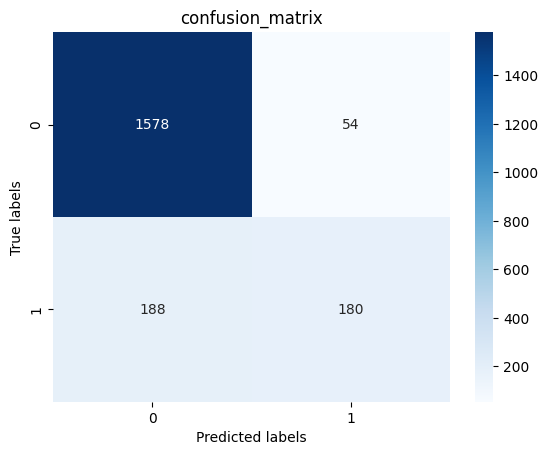

In [98]:
cm = confusion_matrix(y_test , y_pred_vot )

sns.heatmap(cm , annot=True, fmt='d', cmap="Blues")
plt.title("confusion_matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()